In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [110]:
df_train = pd.read_csv("Loan_Status_Train.csv")
df_test = pd.read_csv("Loan_Status_Test.csv")
df_train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.00,NaN,360.00,1.00,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.00,128.00,360.00,1.00,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.00,66.00,360.00,1.00,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.00,120.00,360.00,1.00,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.00,141.00,360.00,1.00,Urban,Y


In [111]:
df_test.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.00,360.00,1.00,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.00,360.00,1.00,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.00,360.00,1.00,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.00,360.00,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.00,360.00,1.00,Urban


In [112]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [113]:
print(df_train.shape,df_test.shape)

(614, 13) (367, 12)


# Categorical Features

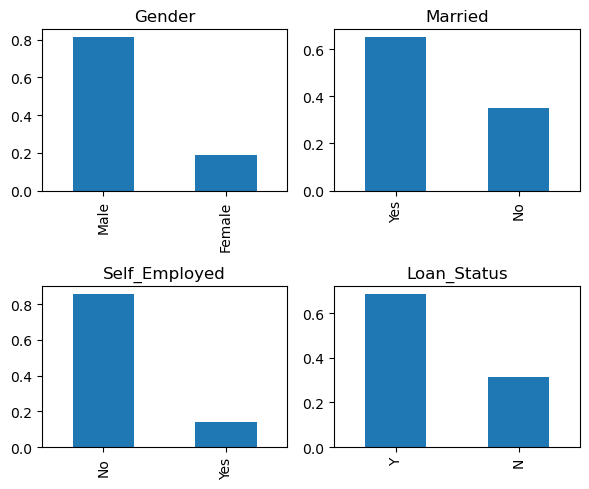

In [114]:
plt.figure(figsize=(6,5))
cat_feat = ['Gender','Married','Self_Employed','Loan_Status']
for i in range(len(cat_feat)):
    plt.subplot(2,2,i+1)
    df_train[cat_feat[i]].value_counts(normalize=True).plot.bar()
    plt.title(cat_feat[i])

plt.tight_layout()
plt.show()

# Ordinal Features

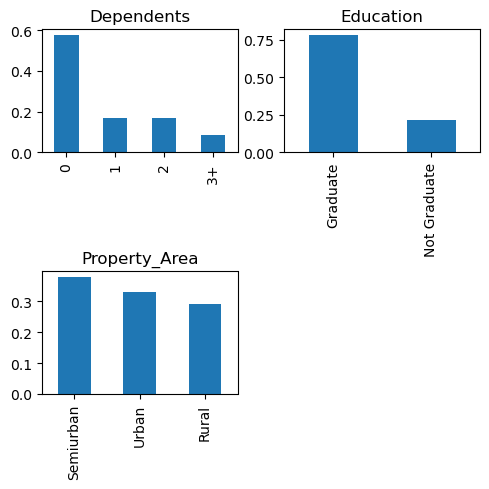

In [115]:
plt.figure(figsize=(5,5))
ord_feat = ['Dependents','Education','Property_Area']
for i in range(len(ord_feat)):
    plt.subplot(2,2,i+1)
    df_train[ord_feat[i]].value_counts(normalize=True).plot.bar()
    plt.title(ord_feat[i])

plt.tight_layout()
plt.show()

# Categorical Vs Target Variable

Loan_Status    N    Y
Gender               
Female      0.06 0.12
Male        0.25 0.56
Loan_Status    N    Y
Married              
No          0.13 0.22
Yes         0.18 0.47
Loan_Status    N    Y
Dependents           
0           0.18 0.40
1           0.06 0.11
2           0.04 0.13
3+          0.03 0.06
Loan_Status      N    Y
Self_Employed          
No            0.27 0.59
Yes           0.04 0.10
Loan_Status      N    Y
Property_Area          
Rural         0.11 0.18
Semiurban     0.09 0.29
Urban         0.11 0.22
Loan_Status     N    Y
Education             
Graduate     0.23 0.55
Not Graduate 0.08 0.13


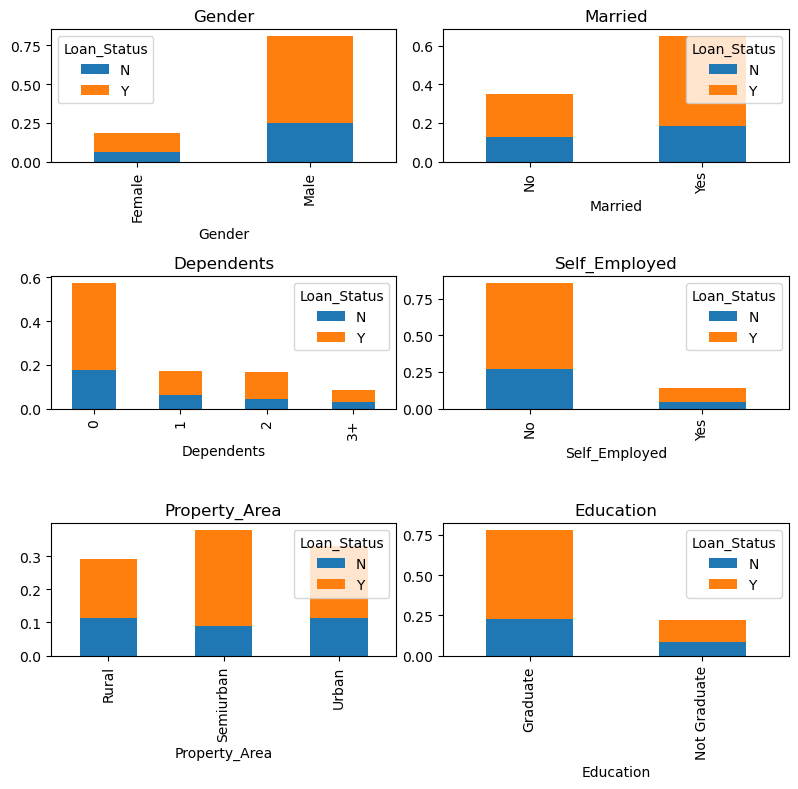

In [116]:
plt.figure(figsize=(8,8))
feat = ['Gender','Married','Dependents','Self_Employed','Property_Area','Education']
for i in range(len(feat)):
    ax = plt.subplot(3,2,i+1)
    ct = pd.crosstab(df_train[feat[i]],df_train['Loan_Status'], normalize=True)
    print(ct)
    ct.plot(kind='bar',stacked=True,ax=ax)
    plt.title(feat[i])
    
plt.tight_layout()
plt.show()

# DataCleaning

Train Data

In [117]:
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [118]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [119]:
def fillnull(feature):
    df_train[feature] = df_train[feature].fillna(df_train[feature].mode()[0])
    
null_cat = ['Gender','Married','Credit_History','Dependents','Self_Employed','Loan_Amount_Term']
for cat in null_cat:
    fillnull(cat)


<AxesSubplot:>

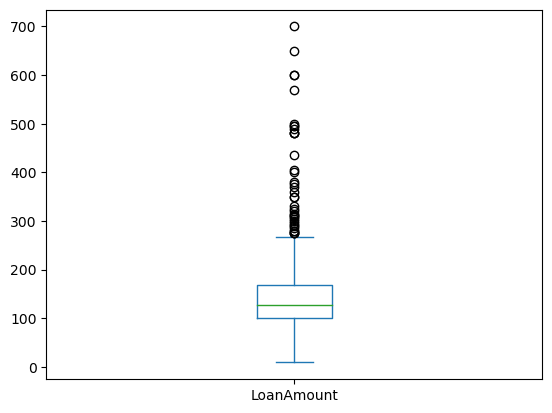

In [120]:
df_train['LoanAmount'].plot(kind='box')

As we can see there are too many outlier, hence its better to go with median instead of mean

In [121]:
df_train['LoanAmount'] = df_train['LoanAmount'].fillna(round(df_train['LoanAmount'].median(),1))

In [122]:
df_train["Dependents"] = df_train["Dependents"].replace('3+','3')

In [123]:
df_train["Dependents"].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

Test DF

In [124]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [125]:
def fillnull(feature):
    df_test[feature] = df_test[feature].fillna(df_test[feature].mode()[0])
    
null_cat = ['Gender','Married','Credit_History','Dependents','Self_Employed','Loan_Amount_Term']
for cat in null_cat:
    fillnull(cat)

In [126]:
df_test['LoanAmount'] = df_test['LoanAmount'].fillna(round(df_test['LoanAmount'].median(),1))

In [127]:
df_test["Dependents"] = df_test["Dependents"].replace('3+','3')

In [128]:
Test = df_test.copy() #Keeping a copy of the original data

# Feature Engineering

In [129]:
df_train["TotalIncome"] = df_train['ApplicantIncome'] + df_train['CoapplicantIncome']
df_train['EMI']=df_train['LoanAmount']/df_train['Loan_Amount_Term']
df_train['Balance_Income']=df_train['TotalIncome']-df_train['EMI']*1000

df_train.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term'], axis=1, inplace=True)

Test DF

In [130]:
df_test["TotalIncome"] = df_test['ApplicantIncome'] + df_test['CoapplicantIncome']
df_test['EMI']=df_test['LoanAmount']/df_test['Loan_Amount_Term']
df_test['Balance_Income']=df_test['TotalIncome']-df_test['EMI']*1000

df_test.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term'], axis=1, inplace=True)

In [131]:
df_train.head(10)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,Loan_Status,TotalIncome,EMI,Balance_Income
0,Male,No,0,Graduate,No,128.00,1.00,Urban,Y,5849.00,0.36,5493.44
1,Male,Yes,1,Graduate,No,128.00,1.00,Rural,N,6091.00,0.36,5735.44
2,Male,Yes,0,Graduate,Yes,66.00,1.00,Urban,Y,3000.00,0.18,2816.67
3,Male,Yes,0,Not Graduate,No,120.00,1.00,Urban,Y,4941.00,0.33,4607.67
4,Male,No,0,Graduate,No,141.00,1.00,Urban,Y,6000.00,0.39,5608.33
5,Male,Yes,2,Graduate,Yes,267.00,1.00,Urban,Y,9613.00,0.74,8871.33
6,Male,Yes,0,Not Graduate,No,95.00,1.00,Urban,Y,3849.00,0.26,3585.11
7,Male,Yes,3,Graduate,No,158.00,0.00,Semiurban,N,5540.00,0.44,5101.11
8,Male,Yes,2,Graduate,No,168.00,1.00,Urban,Y,5532.00,0.47,5065.33
9,Male,Yes,1,Graduate,No,349.00,1.00,Semiurban,N,23809.00,0.97,22839.56


# Encoding

In [132]:
def getDummy(feature):
    try:
        df_train[feature] = pd.get_dummies(df_train[feature],drop_first=True)
        df_test[feature] = pd.get_dummies(df_test[feature],drop_first=True)
    except KeyError:
        print("LoanStatus is not found in test data")
enc_cat = ['Gender','Married','Education','Self_Employed','Loan_Status']
for cat in enc_cat:
    getDummy(cat)

LoanStatus is not found in test data


In [133]:
train_ohe = pd.get_dummies(df_train["Property_Area"])
test_ohe = pd.get_dummies(df_test["Property_Area"])

In [134]:
df_train = pd.concat([df_train, train_ohe], axis=1)
df_test = pd.concat([df_test, test_ohe], axis=1)

In [135]:
df_train = df_train.drop("Property_Area", axis=1)
df_test = df_test.drop("Property_Area", axis=1)

<AxesSubplot:>

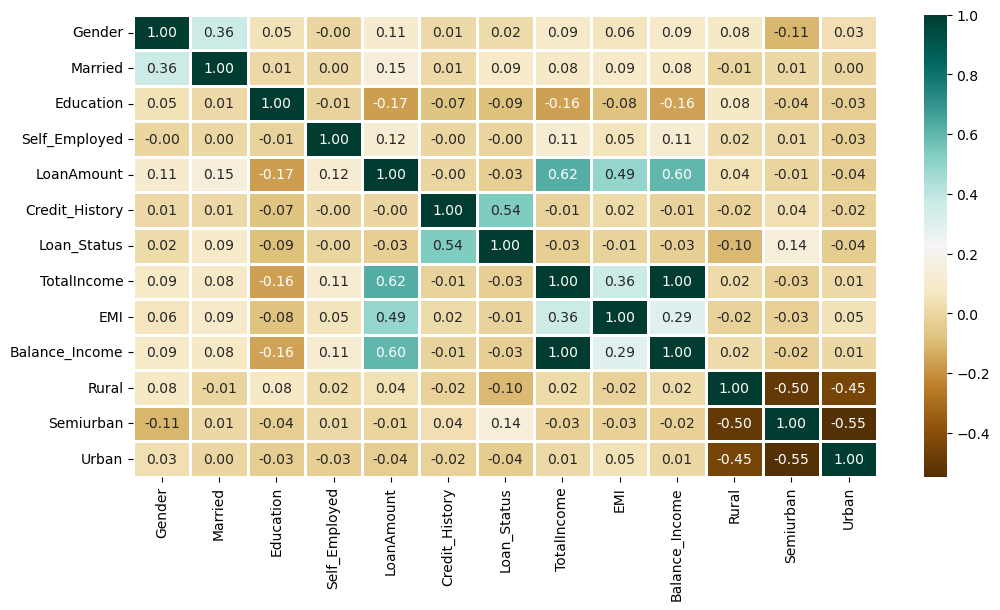

In [136]:
#To check the correlation of the features with respect to loan status
plt.figure(figsize=(12,6))
sns.heatmap(df_train.corr(),cmap='BrBG',fmt='.2f',
            linewidths=2,annot=True)

# Split the Data

In [137]:
X=df_train.drop("Loan_Status", axis=1)
y=df_train["Loan_Status"]
X.shape,y.shape

((614, 13), (614,))

In [138]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=5)

# Prediction and Selecting Algorithm

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

Logistic Regression

In [140]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 11.66it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SGDClassifier,0.82,0.75,0.75,0.81,0.04
BernoulliNB,0.84,0.74,0.74,0.83,0.02
NearestCentroid,0.80,0.73,0.73,0.80,0.03
LinearSVC,0.84,0.73,0.73,0.82,0.08
LogisticRegression,0.84,0.73,0.73,0.82,0.04
CalibratedClassifierCV,0.84,0.73,0.73,0.82,0.23
RidgeClassifierCV,0.84,0.73,0.73,0.82,0.03
RidgeClassifier,0.84,0.73,0.73,0.82,0.03
NuSVC,0.84,0.73,0.73,0.82,0.06


In [141]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
hyperparameters = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 1000, 10000]
}
LRHModel = LogisticRegression()
#cv = KFold(n_splits=5, shuffle=True,random_state=5)
cv = ShuffleSplit(n_splits=3, test_size=0.3, random_state=15)
LRGcv =  GridSearchCV(LRHModel, hyperparameters, cv=cv, scoring='accuracy')
LRGcv.fit(X,y)

print("Best Hyperparameters:", LRGcv.best_params_)
print("Best Accuracy Score:", LRGcv.best_score_)

Best Hyperparameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy Score: 0.8234234234234235


In [142]:
LRGcvmodel = LRGcv.best_estimator_
LRGcvpred = LRGcvmodel.predict(X_test)
LRGcvaccuracy = accuracy_score(y_test,LRGcvpred)
print(LRGcvaccuracy)

0.8378378378378378


In [143]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
Rf_pred = rfc.predict(X_test)
Rfaccuracy = accuracy_score(y_test,Rf_pred)
print(Rfaccuracy)

0.7945945945945946


In [144]:
print(confusion_matrix(y_test,LRGcvpred))
print(classification_report(y_test,LRGcvpred))

[[ 25  26]
 [  4 130]]
              precision    recall  f1-score   support

           0       0.86      0.49      0.62        51
           1       0.83      0.97      0.90       134

    accuracy                           0.84       185
   macro avg       0.85      0.73      0.76       185
weighted avg       0.84      0.84      0.82       185



# Predicting Test Data using the developed Model

In [145]:
LRPred = LRGcvmodel.predict(df_test)

In [146]:
#Merging the predicted data to test data
Test['Loan_Status'] = LRPred
Test.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.00,360.00,1.00,Urban,1
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.00,360.00,1.00,Urban,1
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.00,360.00,1.00,Urban,1
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.00,360.00,1.00,Urban,1
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.00,360.00,1.00,Urban,1


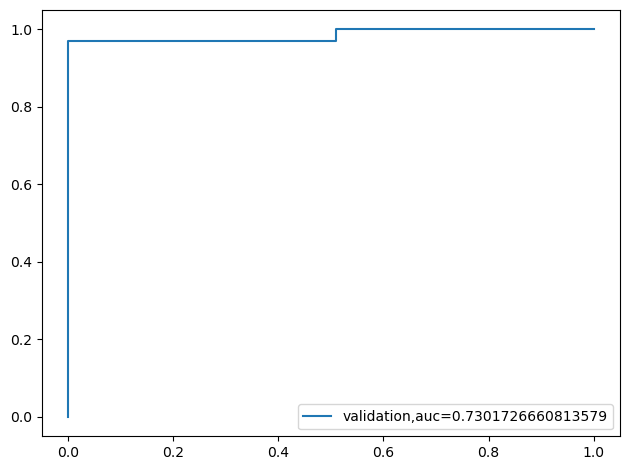

In [147]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr,tpr,_=roc_curve(y_test,LRGcvpred)
auc=roc_auc_score(y_test,LRGcvpred)

plt.step(fpr,tpr,label='validation,auc='+str(auc))

plt.legend(loc='best')
plt.tight_layout()
#plt.savefig("ROC_AUC.png")

plt.show()

In [148]:
df_test.to_csv('PredictedStatus.csv', index=False)